# Visualizing Data in Python
## Tables, Histograms, Boxplots, and Slicing for Statistics

When working with a new dataset, we should generate tables, histograms, and boxplots to get some first impressions about the data. We can use these to start asking more interesting questions about the data

In [1]:
# Import packages
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
# Load dataset csv
# If you want to take a look at the csv
# https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv
tips_data = sns.load_dataset('tips')

In [3]:
print([x for x in dir(tips_data) if not x.startswith('__') and not x.startswith('_')])

['T', 'abs', 'add', 'add_prefix', 'add_suffix', 'agg', 'aggregate', 'align', 'all', 'any', 'append', 'apply', 'applymap', 'asfreq', 'asof', 'assign', 'astype', 'at', 'at_time', 'attrs', 'axes', 'backfill', 'between_time', 'bfill', 'bool', 'boxplot', 'clip', 'columns', 'combine', 'combine_first', 'compare', 'convert_dtypes', 'copy', 'corr', 'corrwith', 'count', 'cov', 'cummax', 'cummin', 'cumprod', 'cumsum', 'day', 'describe', 'diff', 'div', 'divide', 'dot', 'drop', 'drop_duplicates', 'droplevel', 'dropna', 'dtypes', 'duplicated', 'empty', 'eq', 'equals', 'eval', 'ewm', 'expanding', 'explode', 'ffill', 'fillna', 'filter', 'first', 'first_valid_index', 'flags', 'floordiv', 'from_dict', 'from_records', 'ge', 'get', 'groupby', 'gt', 'head', 'hist', 'iat', 'idxmax', 'idxmin', 'iloc', 'index', 'infer_objects', 'info', 'insert', 'interpolate', 'isin', 'isna', 'isnull', 'items', 'iteritems', 'iterrows', 'itertuples', 'join', 'keys', 'kurt', 'kurtosis', 'last', 'last_valid_index', 'le', 'loc', 

In [4]:
# print out the first few rows of the data using sns head()
tips_data.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### Describing Data
Calculate some summary statistics about the variable(features) of the dataset

In [5]:
# Summary statistics of all variables, including qualitive
tips_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
total_bill,244.0,NaN,NaN,NaN,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,NaN,NaN,NaN,2.998279,1.383638,1.0,2.0,2.9,3.5625,10.0
sex,244,2,Male,157,NaN,NaN,NaN,NaN,NaN,NaN,NaN
smoker,244,2,No,151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,244,4,Sat,87,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time,244,2,Dinner,176,NaN,NaN,NaN,NaN,NaN,NaN,NaN
size,244.0,NaN,NaN,NaN,2.569672,0.9511,1.0,2.0,2.0,3.0,6.0


In [6]:
# Summary Statistics of quantitative variables
tips_data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


Some questions we can begin to ask: 
* Does the size of the party affect tips? 
* Is bill total correlated to the tip amount? 

#### Creating a Histogram
Lets take a look at the shape of the distribution of the data

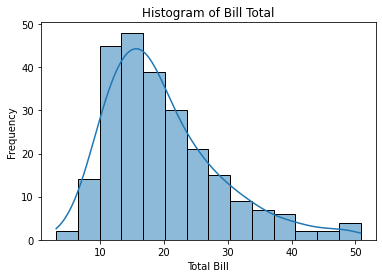

In [7]:
# Create histogram for bill total 
sns.histplot(tips_data['total_bill'], kde=True)
plt.title('Histogram of Bill Total')
plt.xlabel('Total Bill')
plt.ylabel('Frequency')
plt.show()

From the graph we can notice the following about the distribution: 
* It is unimodal
* It is skewed to the right, which means the mean may be larger than the median. 


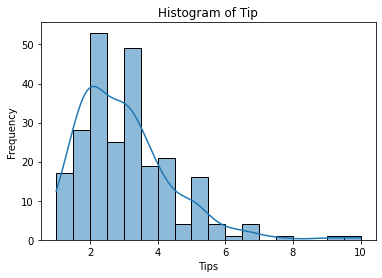

In [8]:
# Create histogram for tips
sns.histplot(tips_data['tip'], kde=True)
plt.title('Histogram of Tip')
plt.xlabel('Tips')
plt.ylabel('Frequency')
plt.show()

The tip histogram is also skewed to the right. We can see a long tail, which represent outliers, or people that left high tips. 

#### Boxplots
Boxplots give you insight into the range and center of data, but doest not provide indication about the shape


In [9]:
tips_data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


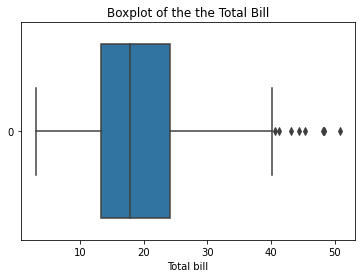

In [10]:
# Create boxplot for total bill
sns.boxplot(data=tips_data['total_bill'], orient='h')
plt.title('Boxplot of the the Total Bill')
plt.xlabel('Total bill')
plt.show()

Here we can see that `total_bill` has some outliers at the right hand side of the distribution between 40-55. The median is around 18. We can look at the summary statistics table, and see that the median for `total_bill`, represented `50%`, is 17.795

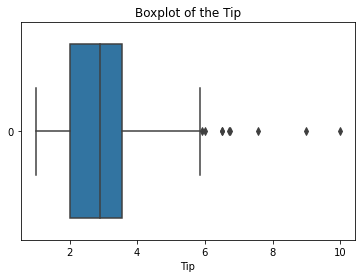

In [11]:
# Create boxplot for tips
sns.boxplot(data=tips_data['tip'], orient='h')
plt.title('Boxplot of the Tip')
plt.xlabel('Tip')
plt.show()

In this plot, we can also see some  outliers to the right hand side of the graph. Tips between 6-10 are not common. Median is close to 3, and we can compare it to the actualy value from summary statistics 2.9

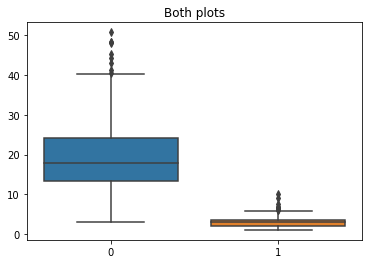

In [12]:
# plot both boxplots
sns.boxplot(data=[tips_data['total_bill'],tips_data['tip']])
plt.title('Both plots')
plt.show()


---
#### Create Histogram and Boxplot Plotted by Groups
Visualizing how changes in one variable can affect another. 

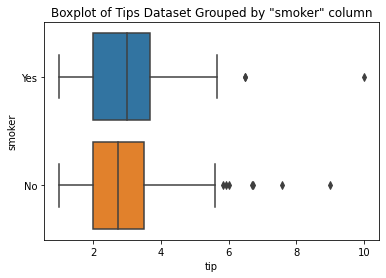

In [13]:
# plotting tips grouped by smoking
sns.boxplot(x = tips_data['tip'], y = tips_data['smoker'])
plt.title('Boxplot of Tips Dataset Grouped by "smoker" column')
plt.show()


We can see that the two boxes are similar. For tip size, non smokers seem to have more outliers towards the right, but smokers have the outlier with the highest value above 10. The median for both are around the same, and the *Interquartile Range(Q3-Q1)* are similar too.

##### FacetGrid
The [FacetGrid](https://seaborn.pydata.org/tutorial/axis_grids.html) class is useful when you want to visualize the distribution of a variable or the relationship between multiple variables separately within subsets of your dataset.

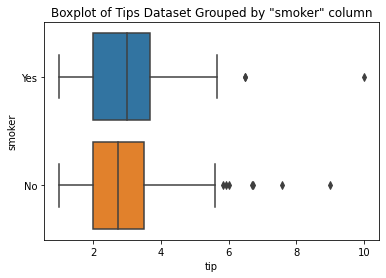

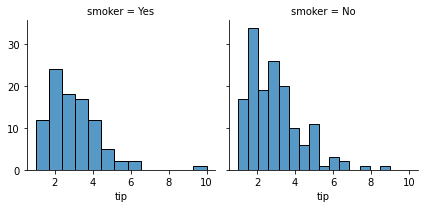

In [14]:
sns.boxplot(x = tips_data['tip'], y = tips_data['smoker'])
plt.title('Boxplot of Tips Dataset Grouped by "smoker" column')

g = sns.FacetGrid(tips_data, col="smoker")
g.map(sns.histplot, 'tip')
plt.show()

We have histograms of people who smoke and don't smoke. We have have tip size in the x axis and frequency  on the y axis. We can use these graphs and compare it to the boxplot to get further insight into the data. 

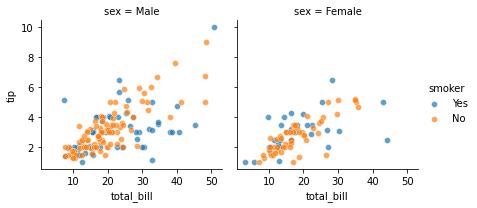

In [15]:
# Scatter plot of tip size and total bill, grouped by gender
g = sns.FacetGrid(tips_data, col="sex", hue="smoker")
g.map(sns.scatterplot, "total_bill", "tip", alpha=.7)
g.add_legend()
#plt.title('Scatterplot of Tip and Total Bill, Grouped by Gender',loc='center')
plt.show()

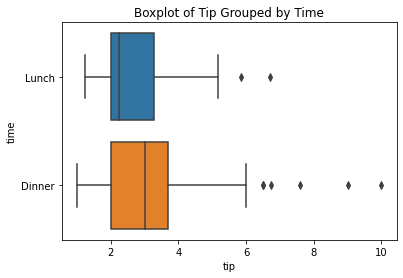

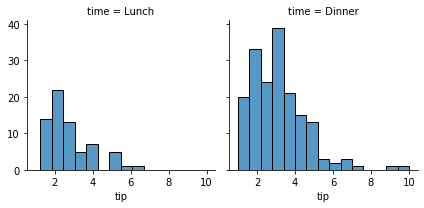

In [16]:
# plotting tips grouped by time 
sns.boxplot(x=tips_data['tip'], y = tips_data['time'])
plt.title('Boxplot of Tip Grouped by Time')
g = sns.FacetGrid(tips_data, col = 'time')
g.map(sns.histplot, 'tip')
plt.show()

Here we can observe that tip size seem to be higher during dinner. Tip size is skewed to the right for both lunch and dinner, and there are more outliers for dinner. 

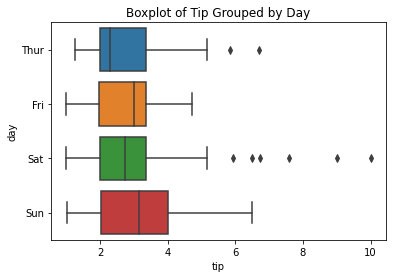

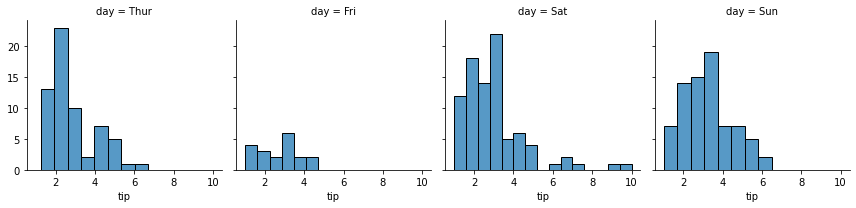

In [17]:
# Plot for tips grouped by day of the week 
sns.boxplot(x=tips_data['tip'], y = tips_data['day'])
plt.title('Boxplot of Tip Grouped by Day')
g = sns.FacetGrid(tips_data, col = 'day')
g.map(sns.histplot, 'tip')
plt.show()

There are outliers for Thursday and Saturday. The largest tips are given on Saturdays, and lowest are Thursday based on the median. 